# Imports

In [1]:
import pandas as pd
import requests
import json
import matplotlib

In [3]:
params = {
    'token': 'p.eyJ1IjogImYxNDQzM2QxLWJhZWEtNGM5MC04ZDc1LWIxNmJiZDBkM2NjZSIsICJpZCI6ICI2NGRlZmY5Mi0xMDcyLTQ3MDYtOTQ0My02ODM1ZjE0NDE1ZGYifQ.ANDdHelFCeqlBZO9lmVxeSjrGBbW2y1ZFMVHBfEht44',
    'q':'SELECT * FROM nyc_taxi_zone_clean_pipe'
}

url = f'https://api.tinybird.co/v0/pipes/nyc_taxi_zone_clean_pipe.json'
response = requests.get(url, params=params)
stream = response.json()
stream.keys()
#stream['data']
#print(stream)

dict_keys(['meta', 'data', 'rows', 'rows_before_limit_at_least', 'statistics'])

In [4]:
#f_stat = open(r'./stations.json')
#stat_json = json.load(f_stat)
df_stats = pd.json_normalize(stream, record_path=['data']) # normalize because of the nested list/dicts
#f_stat.close() # close file descriptor
df_stats.info()
# change to datetime pickup and dropoff
#df_stats['trip_time'] = pd.to_numeric(df_stats['trip_time'] , errors='coerce' , downcast='integer')
df_stats['pickup_datetime'] = pd.to_datetime(df_stats['pickup_datetime'])
df_stats['dropoff_datetime'] = pd.to_datetime(df_stats['dropoff_datetime'])
df_stats['puzone'] = df_stats['puzone'].astype(str)
df_stats['dozone'] = df_stats['dozone'].astype(str)
df_stats = df_stats.dropna() # drop nulls
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pickup_datetime   10000 non-null  object 
 1   dropoff_datetime  10000 non-null  object 
 2   puzone            10000 non-null  object 
 3   dozone            10000 non-null  object 
 4   trip_time         10000 non-null  int64  
 5   z_time            0 non-null      object 
 6   passenger_count   10000 non-null  int64  
 7   z_passenger       0 non-null      object 
 8   trip_distance     10000 non-null  float64
 9   z_trip            0 non-null      object 
dtypes: float64(1), int64(2), object(7)
memory usage: 781.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   pickup_datetime   0 non-null      datetime64[ns]
 1   drop

array([[<AxesSubplot:title={'center':'trip_distance'}>]], dtype=object)

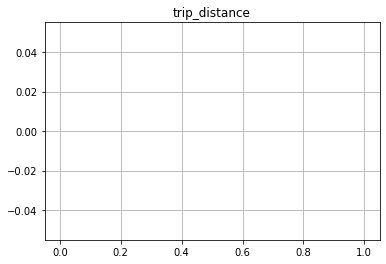

In [6]:
df_stats.hist(column='trip_distance') #Histogram